In [1]:
%ls

'A6 Presentacion (1) (1) (1).ipynb'   Class5.ipynb            reg_data.csv
 Clase1.ipynb                        'Class 8 (5).ipynb'      requirements.txt
 Clase2.ipynb                         datasets/               Tarea1.ipynb
 Clase3.ipynb                         defunciones_corte.csv  'Tarea2 (1).ipynb'
 Clase4.ipynb                         mic2.xlsx
 Clase7.ipynb                         README.md


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('reg_data.csv')
#df

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.8 MB/s            
     |████████████████████████████████| 233 kB 41.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 4.8 MB/s            
     |████████████████████████████████| 306 kB 55.5 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=4481d7703c0a19cfb66b4f8a1dd6107ebd37319768b1150801f6a452dc4ab1b0
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [9]:
df.dropna(inplace = True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


1. Is there any effect of age on Salary? Use regression model to answer the question.

salary = b0 + b1*age

y = c + mx

y = df['Salary']
x = df['Age']

In [10]:
y = df['Salary']
x = df['Age']

type(x)

pandas.core.series.Series

In [11]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

In [12]:
lm = linear_model.LinearRegression()

model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [13]:
print('The y intercept, b0 is = ', model_lm.intercept_)
print('The coefficient, b1 is = ', model_lm.coef_)
print('The R^2 is = ', model_lm.score(x,y))

The y intercept, b0 is =  [349.44580104]
The coefficient, b1 is =  [[48.09321584]]
The R^2 is =  0.380484541757693


# Salary = 349.44580104 + 48.09321584 * Age

Salary does not only depend on age.

In [14]:
modelA = sm.OLS.from_formula('Salary ~ Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        19:49:07   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. What is the Salary of a person with age 33?

In [15]:
print('The salary of a person with age 33 is : ',349.4458+48.0932*33)

The salary of a person with age 33 is :  1936.5214


In [17]:
print('The resitudal of the first two data are : ', 1500 - 1936.5214, 1200 - 1936.5214)

The resitudal of the first two data are :  -436.5214000000001 -736.5214000000001


In [20]:
resiA = resultA.resid
fitValues = resultA.fittedvalues
resiA
fitValues

0     1936.521924
1     1936.521924
2     1984.615140
3     2369.360866
4     1744.149060
5     2369.360866
6     2754.106593
7     2994.572672
8     1840.335492
9     2561.733730
10    2080.801571
11    2657.920161
dtype: float64

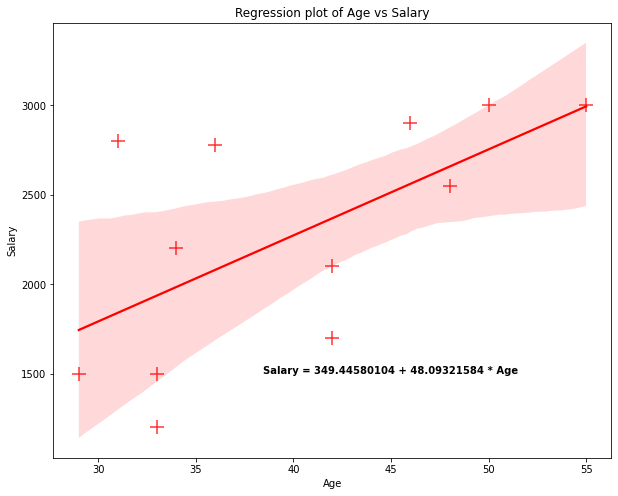

In [29]:
plt.figure(figsize = (10,8))

ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df, 
                 color = 'red',
                 marker = '+',
                 scatter_kws = {'s':200},
                )
ax.set(xlabel = 'Age',
      ylabel = 'Salary')

ax.text (45,1500, 'Salary = 349.44580104 + 48.09321584 * Age',
         horizontalalignment = 'center', size = 'medium',
         color = 'black', weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

Conclusion: The salary is not only dependent on Age but algo some other variables as well.

salary = b0 + b1Age + b2Gender

In [30]:
modelB = sm.OLS.from_formula('Salary ~ Age + Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        20:25:10   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salary = 749.8157 + 34.2211*Age + 306.7169*Gender_male

1. What is the salary of a male person with age 42

In [32]:
print('The salary of a male person with age 42 is : ',
      749.8157 + 34.2211*42 + 306.7169*1)
print('The salary of a female person with age 42 is : ',
      749.8157 + 34.2211*42 + 306.7169*0)

The salary of a male person with age 42 is :  2493.8188
The salary of a female person with age 42 is :  2187.1019


In [34]:
x = 2493.8188 - 2187.1019
x

306.7168999999999

What is the salary of a person with Age = 21, Gender = Female, Academic Degree = Bachelor

In [36]:
modelC = sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree', data = df)
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.267
Time:                        20:37:09   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salary = 815.5485 + 36.37651*Age + 336.1028*Gender_male + -43.8495 * Academic_degree_no

In [39]:
print('The salary of a person with Age = 21, Gender = Female, Academic degree = Bachelor: ',
     815.5485 + 36.37651*21 + 336.1028*0 + -43.8495 * 0)

The salary of a person with Age = 21, Gender = Female, Academic degree = Bachelor:  1579.45521


In [40]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master
